In [8]:
import pandas as pd
import numpy as np
import time
import warnings
import shap
from statwolfml import Builder
from ACME import ACME

In [9]:
import warnings
warnings.filterwarnings("ignore")

## Full Boston dataset

In [10]:
from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
y = boston.target
        
dataframe = pd.DataFrame(X, columns=boston.feature_names)
dataframe['target'] = y

In [11]:
features = dataframe.drop(columns={'target'}).columns

## Train different model

In [12]:
models_name = ['linear_regression','random_forest_regressor','cat_boost_regressor','sgd_regressor','svr']
models = {}
for model in models_name:
        build_model = Builder(model).feature_names(features).labels(['target']).build()
        train_model = build_model.train(dataframe)
        models[model] = train_model

### Compare ASHAP and SHAP results

In [13]:
time_start = {}
time_elapsed = {}

### Random Forest

In [14]:
time_start = time.clock()
acme_rf = ACME(models['random_forest_regressor'].base_model()['model'],'target')
acme_rf = acme_rf.fit(dataframe)
time_elapsed['ASHAP_RF'] = (time.clock() - time_start)

In [15]:
time_start = time.clock()
shap_1 = shap.KernelExplainer(models['random_forest_regressor'].base_model()['model'].predict, shap.sample(dataframe.drop(columns='target'), 1))
shap_1_values = shap_1.shap_values(dataframe.drop(columns='target'))
time_elapsed['SHAP_1'] = (time.clock() - time_start)

In [16]:
time_start = time.clock()
shap_5 = shap.KernelExplainer(models['random_forest_regressor'].base_model()['model'].predict, shap.sample(dataframe.drop(columns='target'), 5))
shap_5_values = shap_5.shap_values(dataframe.drop(columns='target'))
time_elapsed['SHAP_5'] = (time.clock() - time_start)

In [17]:
time_start = time.clock()
shap_10 = shap.KernelExplainer(models['random_forest_regressor'].base_model()['model'].predict, shap.sample(dataframe.drop(columns='target'), 10))
shap_10_values = shap_10.shap_values(dataframe.drop(columns='target'))
time_elapsed['SHAP_10'] = (time.clock() - time_start)

In [18]:
time_start = time.clock()
shap_20 = shap.KernelExplainer(models['svr'].base_model()['model'].predict, shap.sample(dataframe.drop(columns='target'), 20))
shap_20_values = shap_20.shap_values(dataframe.drop(columns='target'))
time_elapsed['SHAP_20'] = (time.clock() - time_start)

In [19]:
time_start = time.clock()
shap_100 = shap.KernelExplainer(models['random_forest_regressor'].base_model()['model'].predict, shap.sample(dataframe.drop(columns='target'), 100))
shap_100_values = shap_100.shap_values(dataframe.drop(columns='target'))
time_elapsed['SHAP_100'] = (time.clock() - time_start)

In [20]:
print(pd.DataFrame(time_elapsed, index=['Elapsed Time']).T.to_latex())

\begin{tabular}{lr}
\toprule
{} &  Elapsed Time \\
\midrule
ASHAP\_RF &      0.370501 \\
SHAP\_1   &    179.294120 \\
SHAP\_5   &    357.230509 \\
SHAP\_10  &    425.610516 \\
SHAP\_20  &    875.858619 \\
SHAP\_100 &   1855.657202 \\
\bottomrule
\end{tabular}



### VISUALIZATION

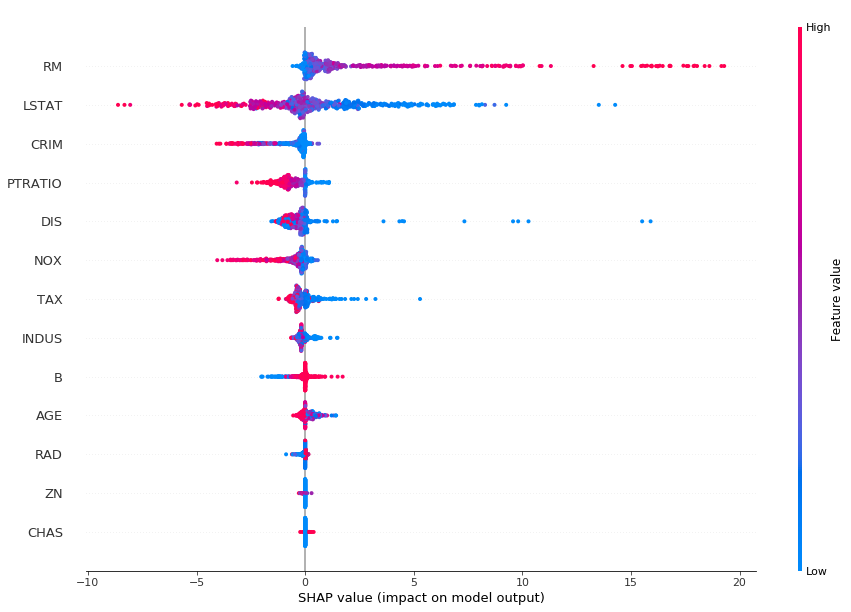

In [39]:
shap.summary_plot(shap_1_values, dataframe.drop(columns='target'), plot_size=(15,10))

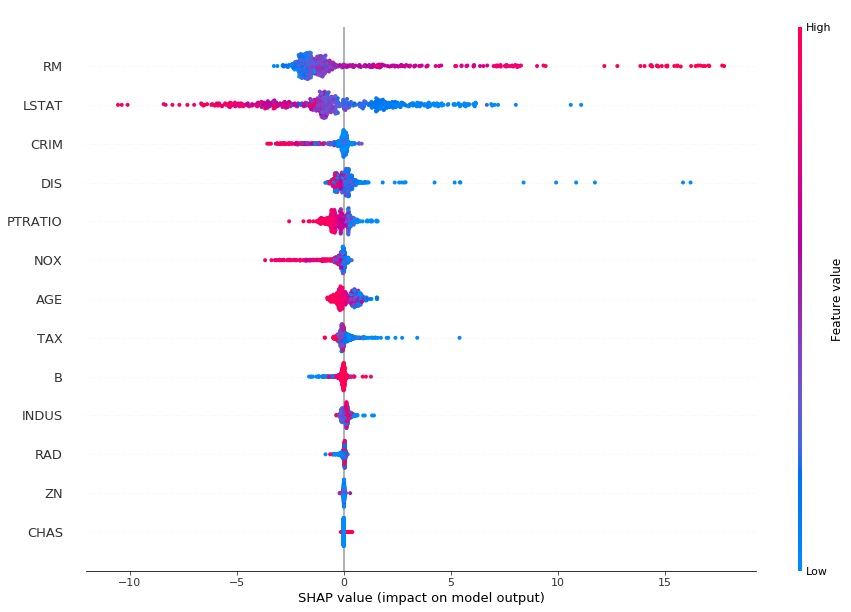

In [40]:
shap.summary_plot(shap_5_values, dataframe.drop(columns='target'), plot_size=(15,10))

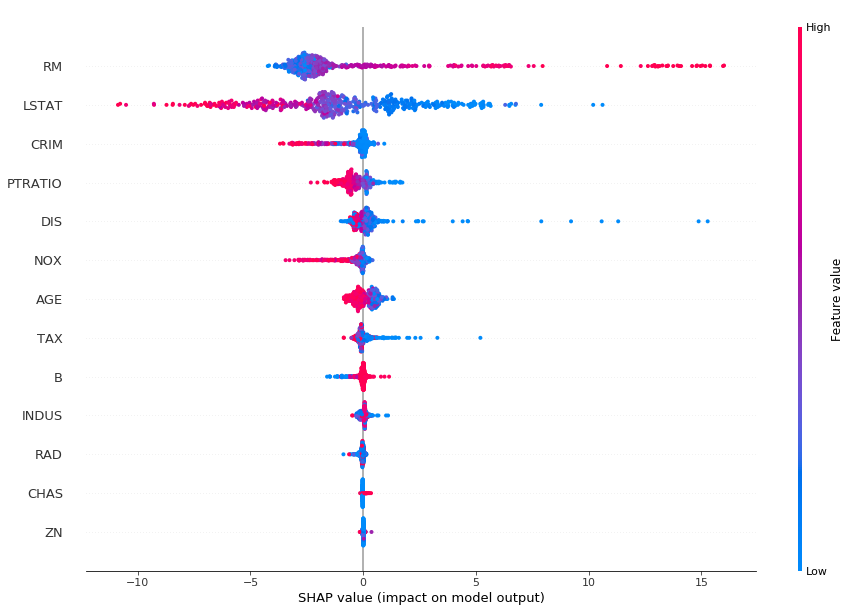

In [44]:
shap.summary_plot(shap_10_values, dataframe.drop(columns='target'), plot_size=(15,10))

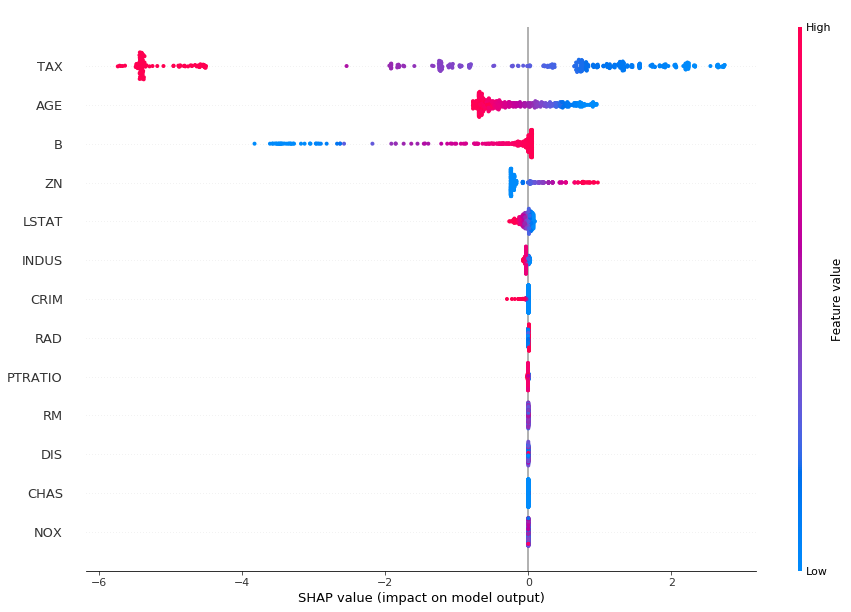

In [42]:
shap.summary_plot(shap_20_values, dataframe.drop(columns='target'), plot_size=(15,10))

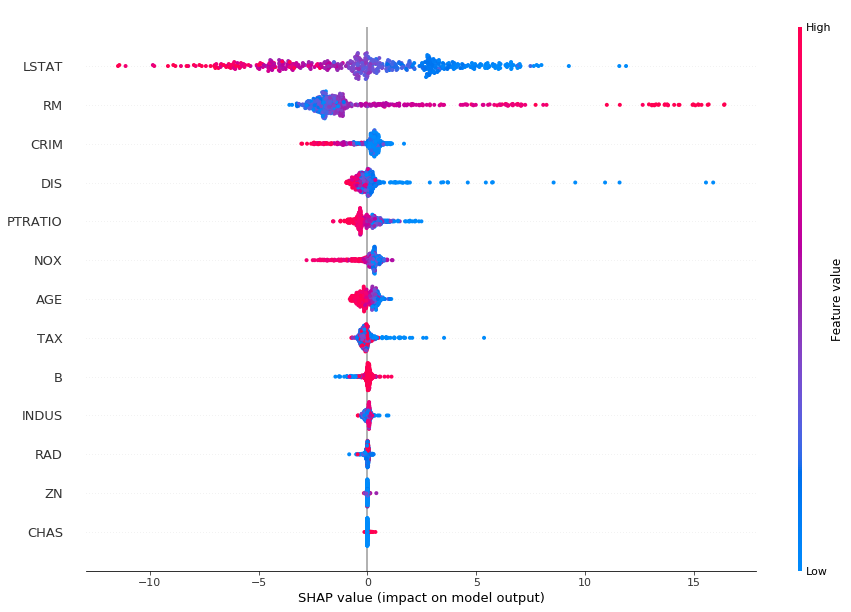

In [43]:
shap.summary_plot(shap_100_values, dataframe.drop(columns='target'), plot_size=(15,10))

## USE THE NSAMPLE

In [26]:
time_start = time.clock()
shap_samp_10 = shap.KernelExplainer(models['random_forest_regressor'].base_model()['model'].predict, shap.sample(dataframe.drop(columns='target'), 506))
shap_samp_10_values = shap_samp_10.shap_values(dataframe.drop(columns='target'), nsamples=10)
time_elapsed['SHAP_10_samp'] = (time.clock() - time_start)

Using 506 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [27]:
time_start = time.clock()
shap_samp_25 = shap.KernelExplainer(models['random_forest_regressor'].base_model()['model'].predict, shap.sample(dataframe.drop(columns='target'), 506))
shap_samp_25_values = shap_samp_10.shap_values(dataframe.drop(columns='target'), nsamples=25)
time_elapsed['SHAP_25_samp'] = (time.clock() - time_start)

Using 506 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [28]:
time_start = time.clock()
shap_samp_50 = shap.KernelExplainer(models['random_forest_regressor'].base_model()['model'].predict, shap.sample(dataframe.drop(columns='target'), 506))
shap_samp_50_values = shap_samp_10.shap_values(dataframe.drop(columns='target'), nsamples=50)
time_elapsed['SHAP_50_samp'] = (time.clock() - time_start)

Using 506 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [29]:
time_start = time.clock()
shap_samp_100 = shap.KernelExplainer(models['random_forest_regressor'].base_model()['model'].predict, shap.sample(dataframe.drop(columns='target'), 506))
shap_samp_100_values = shap_samp_10.shap_values(dataframe.drop(columns='target'), nsamples=100)
time_elapsed['SHAP_100_samp'] = (time.clock() - time_start)

Using 506 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


### VISUALIZATION

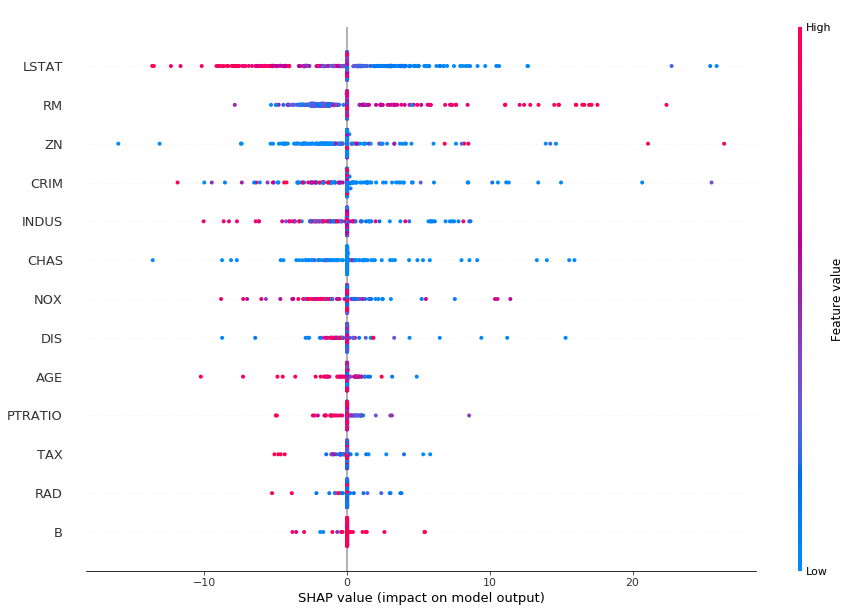

In [35]:
shap.summary_plot(shap_samp_10_values, dataframe.drop(columns='target'), plot_size=(15,10))

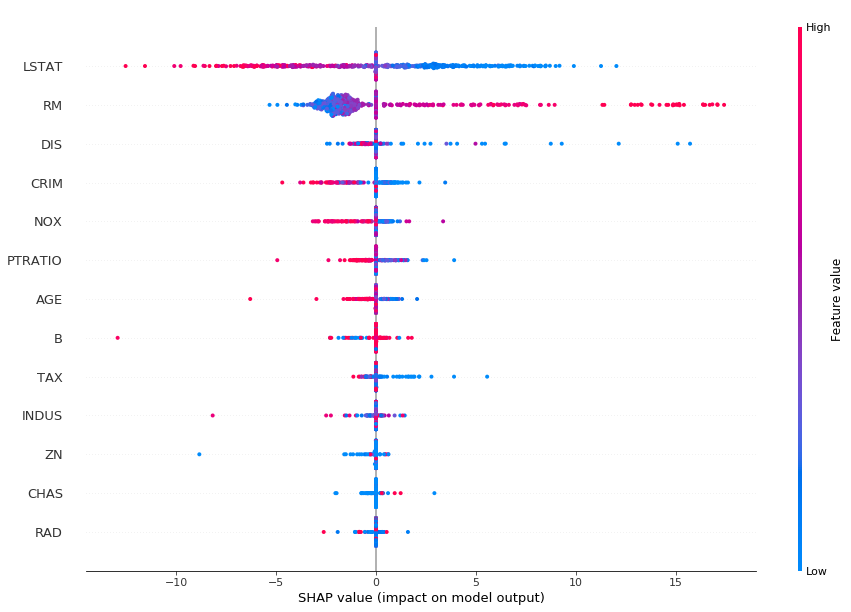

In [36]:
shap.summary_plot(shap_samp_25_values, dataframe.drop(columns='target'), plot_size=(15,10))

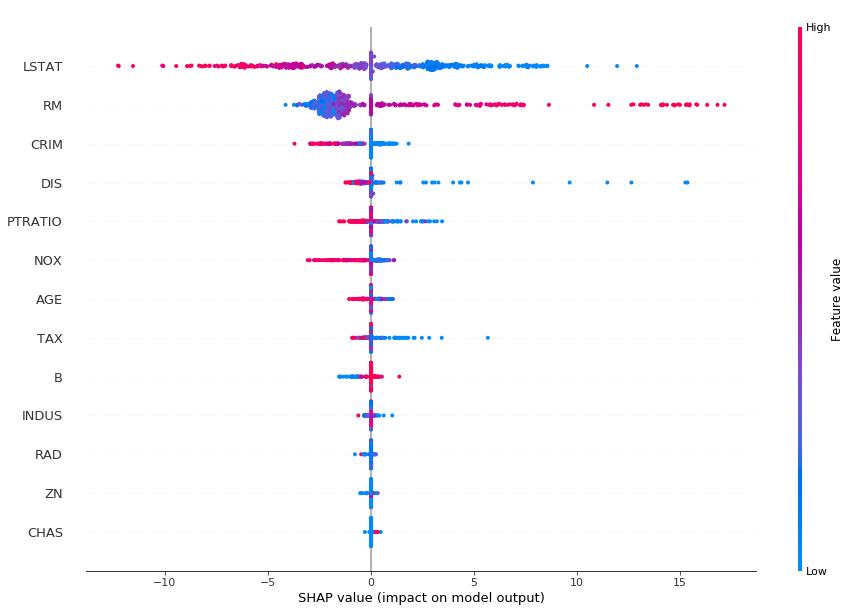

In [37]:
shap.summary_plot(shap_samp_50_values, dataframe.drop(columns='target'), plot_size=(15,10))

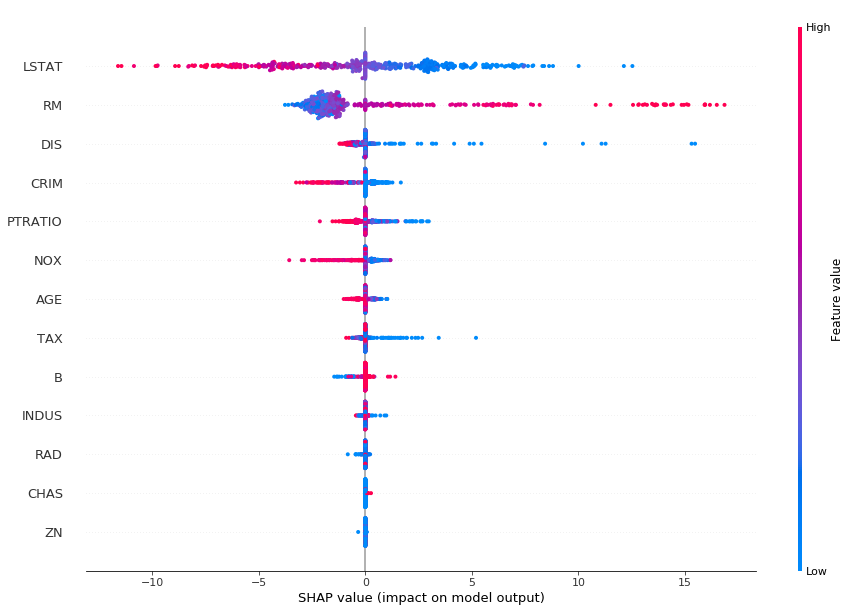

In [38]:
shap.summary_plot(shap_samp_100_values, dataframe.drop(columns='target'), plot_size=(15,10))

### COMBINED

In [45]:
time_start = time.clock()
shap_100_100 = shap.KernelExplainer(models['random_forest_regressor'].base_model()['model'].predict, shap.sample(dataframe.drop(columns='target'), 100))
shap_100_100_values = shap_100.shap_values(dataframe.drop(columns='target'), nsamples=100)
time_elapsed['SHAP_100_100'] = (time.clock() - time_start)

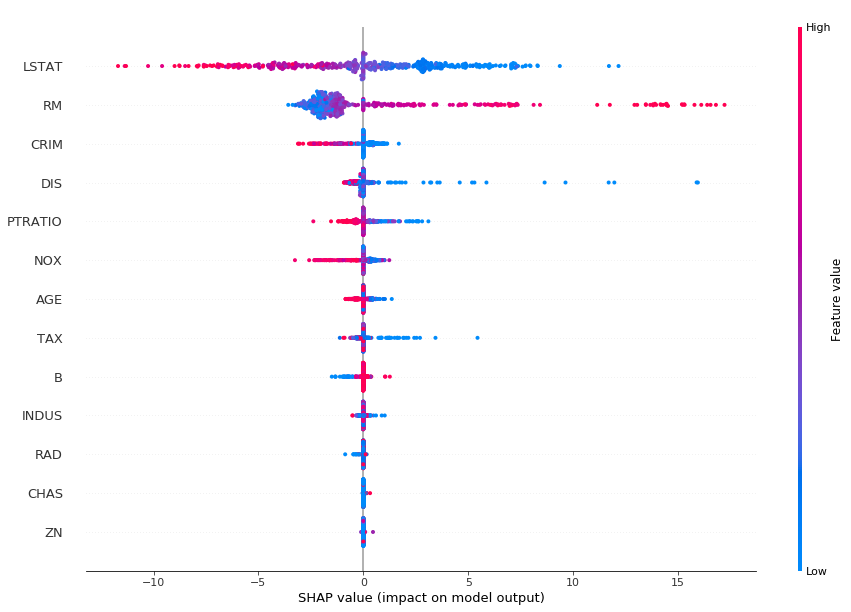

In [46]:
shap.summary_plot(shap_100_100_values, dataframe.drop(columns='target'), plot_size=(15,10))

In [47]:
print(pd.DataFrame(time_elapsed, index=['Elapsed Time']).T.to_latex())

\begin{tabular}{lr}
\toprule
{} &  Elapsed Time \\
\midrule
ASHAP\_RF      &      0.370501 \\
SHAP\_1        &    179.294120 \\
SHAP\_5        &    357.230509 \\
SHAP\_10       &    425.610516 \\
SHAP\_20       &    875.858619 \\
SHAP\_100      &   1855.657202 \\
SHAP\_10\_samp  &     92.399330 \\
SHAP\_25\_samp  &    221.608493 \\
SHAP\_50\_samp  &    327.653422 \\
SHAP\_100\_samp &    506.318414 \\
SHAP\_100\_100  &    240.330099 \\
\bottomrule
\end{tabular}

